# Predicting Stock Prices

##### Quick Links: [Feature Engineering](#Important-Note!) | [Model Fitting and Prediction Evaluation](#Fitting-Models-and-Evaluating-Predictions) | [Creating More Variables](#Creating-More-Variables) | [Conclusions](#Conclusions)
---



<p style='text-align: justify;'>
For this project, we will be working with data from the <a href = 'https://en.wikipedia.org/wiki/S%26P_500_Index'>S&P500 Index</a>, a stock market index that measures the stock performance of <a href="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies">500 large companies</a> listed on stock exchanges in the United States. These include companies such as Apple and Google. 
</p>

An overview of the basics is provided below by <code>Dataquest.io</code>:
    
> <p style='text-align: justify;'> Some companies are publicly traded, which means that anyone can buy and sell their shares on the open market. A share entitles the owner to some control over the direction of the company, and to some percentage (or share) of the earnings of the company. When you buy or sell shares, it's common to say that you're <b>trading a stock</b>.</p>

Now that we know what a stock is, how do we evaluate its price?

> <p style='text-align: justify;'> The price of a share is based mainly on supply and demand for a given stock. For example, Apple stock has a price of 120 dollars per share as of <a href='http://www.nasdaq.com/symbol/aapl'>December 2015</a>. A stock that is in less demand, like Ford Motor Company, <a href='http://finance.yahoo.com/q?s=F'>has a lower price</a>. Stock price is also influenced by other factors, including the number of shares a company has issued. Stocks are traded daily, and <b>the price can rise or fall from the beginning of a trading day to the end based on demand</b>. Stocks that are in more in demand, such as Apple, are traded more often than stocks of smaller companies.</p>

It looks like a stock largely depends on how well a company is doing/how in demand it is. But what are indices for?

> <p style='text-align: justify;'> Indexes aggregate the prices of multiple stocks together, and allow you to see how the market as a whole is performing. For example, the Dow Jones Industrial Average aggregates the stock prices of 30 large American companies together. The S&P500 Index aggregates the stock prices of 500 large companies. <b>When an index fund goes up or down, you can say that the underlying market or sector it represents is also going up or down</b>. For example, if the Dow Jones Industrial Average price goes down one day, you can say that American stocks overall went down (i.e., most American stocks went down in price).</p>


### Goals
Now that we're caught up on our basic understanding of stocks, let's now set our goals for this project:
- <input type="checkbox" disabled> Use historical stock prices data to make future predictions.
- <input type="checkbox" disabled> Forecast how the stock market will perform.

<p style='text-align: justify;'>
We will be working with the <code>sphist.csv</code> dataset, wherein each row in contains a daily record of the price of the S&P500 Index from 1950 to 2015. We will <b>build a predictive model where we'll train the model with data from 1950 to 2012, and try to make predictions from 2013 to 2015</b>.
</p>

### Data Dictionary
The columns of the dataset are:
- <code>Date</code> — The date of the record.
- <code>Open</code> — The opening price of the day (when trading starts).
- <code>High</code> — The highest trade price during the day.
- <code>Low</code> — The lowest trade price during the day.
- <code>Close</code> — The closing price for the day (when trading is finished).
- <code>Volume</code> — The number of shares traded.
- <code>Adj Close</code> — The daily closing price, adjusted retroactively to include any corporate actions.

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# read in the data
sphist = pd.read_csv("sphist.csv")

# first few rows
sphist.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


Now let's convert the <code>Date</code> column to a pandas date type so that we can do comparisons later on.

In [2]:
# using the to_datetime pandas function
sphist["Date"] = pd.to_datetime(sphist['Date'])

# print out some info on number of null
sphist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
Date         16590 non-null datetime64[ns]
Open         16590 non-null float64
High         16590 non-null float64
Low          16590 non-null float64
Close        16590 non-null float64
Volume       16590 non-null float64
Adj Close    16590 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 907.4 KB


Looks like there are no null values in each of the columns. Now let's sort the dataset according to <b>ascending Date values</b>.

In [3]:
# sort to ascending order
sphist = sphist.sort_values("Date", ascending = True)

sphist.head()

,Date,Open,High,Low,Close,Volume,Adj Close
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


### Important Note!
<p style='text-align: justify;'>
As you can tell, this dataset is an example of <b>time series data</b>, and one of its characteristics is that each value is related to values from the past. As such, we cannot treat them as being independent from each other. Additional caution should be given when we train and predict our model later on; we don't want to use "future" values when we do so!
    
So, to capture the relationship while making our model more accurate, we can <b>create indicators</b> that will tell us information about stock prices a certain period of time ago. For example, we can take the average price of the last 10 trades in a row which will incorporate information from multiple prior rows into one, and will make predictions much more accurate. We must note to not include the price for the row itself in order to avoid "giving out the correct answer," so that the model can generalize later on. 
</p>

For now, let's generate indicators using <code>Close</code> as price for:
- Average stock prices in the past <b>5</b> days.
- Average stock prices in the past <b>30</b> days.
- Average stock prices in the past <b>365</b> days.
- The <b>ratio</b> between the average price for the past 5 days, and the average price for the past 365 days.
- The standard deviation of the price over the past <b>5</b> days.
- The standard deviation of the price over the past <b>365</b> days.
- The <b>ratio</b> between the standard deviation for the past 5 days, and the standard deviation for the past 365 days.

<p style='text-align: justify;'>
Using these variables that encapsulate information from past values helps us <b>take into account the dependence of the data on past measurements</b>.
</p>

In [4]:
# we use the pd.DataFrame.rolling method specifying window as the number of past values to compute with
# the shift method allows us to offset this by 1 day to exclude the current date 

# getting rolling averages
sphist["ave_5"]   = sphist["Close"].rolling(window = 5).mean().shift(1)
sphist["ave_30"]  = sphist["Close"].rolling(window = 30).mean().shift(1)
sphist["ave_365"] = sphist["Close"].rolling(window = 365).mean().shift(1)

# getting rolling standard deviations
sphist["std_5"]   = sphist['Close'].rolling(window = 5).std().shift(1)
sphist["std_30"]  = sphist['Close'].rolling(window = 30).std().shift(1)
sphist["std_365"] = sphist['Close'].rolling(window = 365).std().shift(1)

# getting ratios
sphist["ratio_ave"] = sphist["ave_5"]/sphist["ave_365"]
sphist["ratio_std"] = sphist["std_5"]/sphist["std_365"]

sphist[8000:8006]

# check for row 8584, ave_5
# (120.239998 + 121.150002 + 120.260002 + 120.709999 + 121.709999)/5 == 120.814000? Yes!

,Date,Open,High,Low,Close,Volume,Adj Close,ave_5,ave_30,ave_365,std_5,std_30,std_365,ratio_ave,ratio_std
8589,1981-11-16,121.639999,121.639999,119.129997,120.239998,43740000.0,120.239998,122.753999,121.094333,127.847342,0.648638,1.968480,6.360023,0.960161,0.101987
8588,1981-11-17,120.239998,121.779999,119.500000,121.150002,43190000.0,121.150002,122.143999,121.118666,127.866630,1.209889,1.952668,6.326065,0.955245,0.191255
8587,1981-11-18,121.150002,121.660004,119.610001,120.260002,49980000.0,120.260002,121.834000,121.177333,127.887013,1.230216,1.925186,6.292221,0.952669,0.195514
8586,1981-11-19,120.260002,121.669998,119.419998,120.709999,48890000.0,120.709999,121.302000,121.142333,127.902356,1.218266,1.932223,6.266656,0.948395,0.194404
8585,1981-11-20,120.709999,122.589996,120.129997,121.709999,52010000.0,121.709999,120.806000,121.089000,127.915205,0.610843,1.920930,6.247003,0.944423,0.097782
8584,1981-11-23,121.709999,123.089996,120.760002,121.599998,45250000.0,121.599998,120.814000,121.097666,127.932164,0.625084,1.923200,6.221611,0.944360,0.100470


<p style='text-align: justify;'>
Since we're computing indicators that use historical data, there are some rows where there isn't enough historical data to generate them. Some of the indicators use 365 days of historical data, and the dataset starts on <code>1950-01-03</code>. Thus, any rows that fall before <code>1950-01-03</code> don't have enough historical data to compute all the indicators.
</p>

In [5]:
# drop rows without sufficient past values, and rows with NA
sphist = sphist[sphist["Date"] > datetime(year = 1951, month = 1, day = 2)]
sphist = sphist.dropna(axis = 0)

sphist.head()

,Date,Open,High,Low,Close,Volume,Adj Close,ave_5,ave_30,ave_365,std_5,std_30,std_365,ratio_ave,ratio_std
16224,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,21.800,21.703333,19.447726,0.256223,0.473595,1.790253,1.120954,0.143121
16223,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,21.900,21.683000,19.462411,0.213659,0.444648,1.789307,1.125246,0.119409
16222,1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,21.972,21.659667,19.476274,0.092574,0.411452,1.788613,1.128142,0.051758
16221,1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,21.960,21.631000,19.489562,0.115108,0.368514,1.787659,1.126757,0.064390
16220,1951-06-25,21.290001,21.290001,21.290001,21.290001,2440000.0,21.290001,21.862,21.599000,19.502082,0.204132,0.329130,1.786038,1.121008,0.114293


<p style = 'text-align: justify;'>
Now let's split the dataframe into training and test sets. <code>train</code> should contain any rows in the data with a date less than <code>2013-01-01</code>. <code>test</code> should contain any rows with a date greater than or equal to <code>2013-01-01</code>.
</p>

In [6]:
# split df into train and test sets
train = sphist[sphist["Date"] < datetime(year = 2013, month = 1, day = 1)]
test  = sphist[sphist["Date"] >= datetime(year = 2013, month = 1, day = 1)]

### Fitting Models and Evaluating Predictions

Now we're ready to train a Linear Regression model to predict S&P500 stock prices!

For our error metric, instead of the MSE, we make use of the Mean Absolute Error (MAE) and its close, sometimes more intuitive relative, the Mean Absolute Percentage Error (MAPE). 

- Mean Absolute Error: this is an interpretable metric because it has the same unit of measurment as the initial series. A risk metric corresponding to the expected value of the absolute error loss or $l1$-norm loss.<sup>1</sup>

<p style='text-align: center;'>
<img src='https://render.githubusercontent.com/render/math?math=%24MAE%20%3D%20%5Cfrac%7B%5Csum_%7Bi%3D1%7D%5E%7Bn%7D%20%7Cy_i%20-%20%5Chat%7By%7D_i%7C%7D%7Bn%7D%24'>
</p>

- Mean Absolute Percentage Error: this is the same as MAE but is computed as a percentage, which is very convenient when you want to explain the quality of the model in a more intuitive sense.<sup>1</sup>

<p style='text-align: center;'>
$MAPE=\frac{100}{n}\sum\limits_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{y_i}$
</p>

<sup>1</sup>https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python

In [7]:
# instantiate LR
lm = LinearRegression()

# get features and target column
features = [col for col in sphist.columns[sphist.columns.str.contains("_")]]
target   = "Close"

# fit LR model
lm.fit(train[features], train[target])

# get predictions
pred_y = lm.predict(test[features])

# get error metrics
mae = mean_absolute_error(test[target], pred_y)

print("Mean Absolute Error: {}".format(round(mae, 4)))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)) / y_true) * 100

mape = mean_absolute_percentage_error(test[target], pred_y)
print("Mean Absolute Percentage Error: {:.4}%".format(mape))

Mean Absolute Error: 16.2162
Mean Absolute Percentage Error: 0.8654%


<p style='text-align: justify;'>
A MAPE of <code>0.8654%</code> means that, on the average, the predictions are off by that percent of the actual value. Right off the bat, that seems like good performance indeed!
</p>

Let's try to plot out our predictions to visualize how close our predictions were.

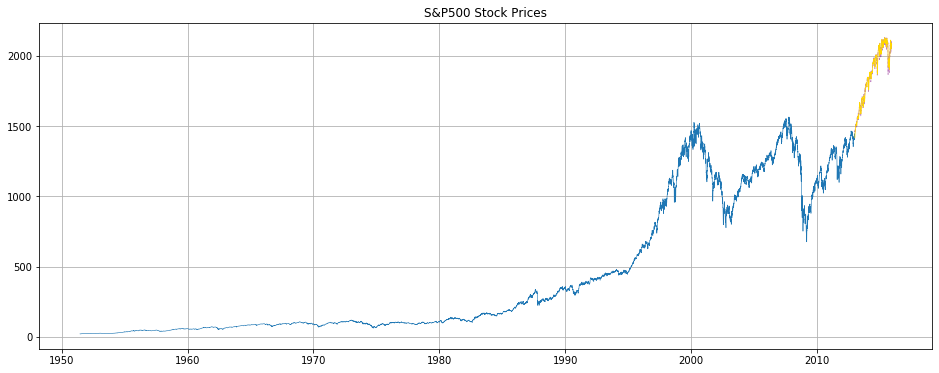

In [8]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize = (16, 6))

# plt.plot(sphist["Date"], sphist[target])
plt.plot(train["Date"], train[target], linewidth = 0.6)
plt.plot(test["Date"], test[target], color = "purple", linewidth = 0.75, alpha = 0.5, linestyle = "--")
plt.plot(test["Date"], pred_y, color = "gold", linewidth = 0.75)
plt.title("S&P500 Stock Prices")
plt.grid(True)

Let's zoom in into the test dataset predictions!

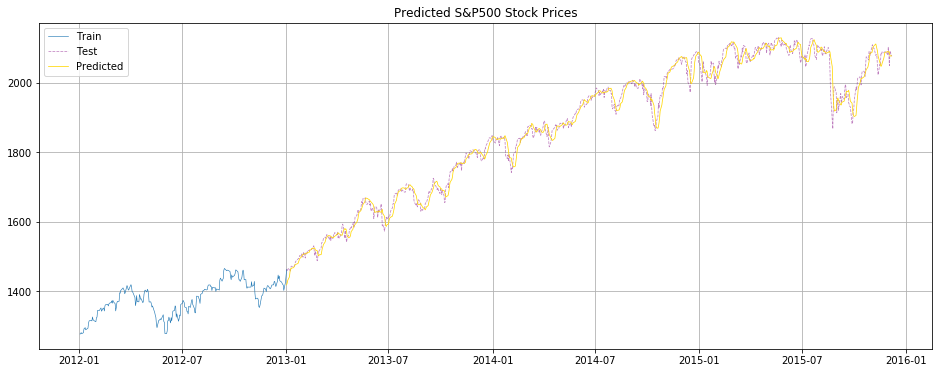

In [9]:
train2 = sphist[(sphist["Date"] > datetime(year = 2012, month = 1, day = 1))
              & (sphist["Date"] <= datetime(year = 2013, month = 1, day = 2))]

fig = plt.figure(figsize = (16, 6))

plt.plot(train2["Date"], train2[target], linewidth = 0.6)
plt.plot(test["Date"], test[target], color = "purple", linewidth = 0.75, alpha = 0.5, linestyle = "--")
plt.plot(test["Date"], pred_y, color = "gold", linewidth = 0.75)
plt.title("Predicted S&P500 Stock Prices")
plt.grid(True)
plt.legend({"Train": "blue", "Test": "purple", "Predicted": "gold"})

# xdata, ydata, linewidth, linestyle, color, marker, markersize, 
# markeredgewidth, markeredgecolor, markerfacecolor, markerfacecoloralt, 
# fillstyle, antialiased, dash_capstyle, solid_capstyle, dash_joinstyle, 
# solid_joinstyle, pickradius, drawstyle, markevery, **kwargs

<p style='text-align: justify;'>
Our predictions were very close and was able to perform admirably in generalizing the model to new data. Still, there is plenty of room for improvement by using other approaches to time-series modeling, especially for making inferences. Some further techniques we can consider are:
</p>

- Adding more relevant indicators
- Adding various date/time values for prediction.

### Creating More Variables
Let's now try to utilize <code>Volume</code>, or the number of shares traded in our model!

- Average volume over the past <b>5</b> days
- Average volume over the past <b>365</b> days
- Median volume over the past <b>5</b> days
- Median volume over the past <b>365</b> days
- Median prices over the past <b>5</b> days
- Median prices over the past <b>365</b> days
- The standard deviation of the average volume over the past <b>5</b> days.
- The standard deviation of the average volume over the past <b>365</b> days.
- The <b>month</b> component of the date.
- The number of <b>days</b> between the date and the minimum date.
- The <b>ratio</b> between the lowest price in the past year and the current price.
- The <b>ratio</b> between the highest price in the past year and the current price.
- The <b>difference</b> between the highest trade price of the day and the lowest.
- The average of the difference in highest/lowest trade price of the past <b>5</b> days.
- The lowest <code>Low</code> in the past.
- The highest <code>How</code> in the past.

In [10]:
# instantiate df again
sphist2 = pd.read_csv("sphist.csv")
sphist2["Date"] = pd.to_datetime(sphist2['Date'])
sphist2 = sphist2.sort_values("Date", ascending = True)

# get earlier indicators
sphist2["ave_5"]   = sphist2["Close"].rolling(window = 5).mean().shift(1)
sphist2["ave_30"]  = sphist2["Close"].rolling(window = 30).mean().shift(1)
sphist2["ave_365"] = sphist2["Close"].rolling(window = 365).mean().shift(1)
sphist2["std_5"]   = sphist2['Close'].rolling(window = 5).std().shift(1)
sphist2["std_30"]  = sphist2['Close'].rolling(window = 30).std().shift(1)
sphist2["std_365"] = sphist2['Close'].rolling(window = 365).std().shift(1)
sphist2["ratio_ave"] = sphist2["ave_5"]/sphist2["ave_365"]
sphist2["ratio_std"] = sphist2["std_5"]/sphist2["std_365"]

# rolling medians for price
sphist2["med_5"]   = sphist2["Close"].rolling(window = 5).median().shift(1)
sphist2["med_30"]  = sphist2["Close"].rolling(window = 30).median().shift(1)
sphist2["med_365"] = sphist2["Close"].rolling(window = 365).median().shift(1)

# getting rolling averages for volume
sphist2["avevol_5"]   = sphist2["Volume"].rolling(window = 5).mean().shift(1)
# sphist2["avevol_30"]  = sphist2["Volume"].rolling(window = 30).mean().shift(1)
sphist2["avevol_365"] = sphist2["Volume"].rolling(window = 365).mean().shift(1)

# getting rolling standard deviations of averages
sphist2["stdvol_5"]   = sphist2["avevol_5"].rolling(window = 5).std().shift(1)
# sphist2["stdvol_30"]  = sphist2["Volume"].rolling(window = 30).std().shift(1)
sphist2["stdvol_365"] = sphist2["avevol_5"].rolling(window = 365).std().shift(1)

# rolling medians for volume
sphist2["medvol_5"]   = sphist2["Volume"].rolling(window = 5).median().shift(1)
sphist2["medvol_30"]  = sphist2["Volume"].rolling(window = 30).median().shift(1)
sphist2["medvol_365"] = sphist2["Volume"].rolling(window = 365).median().shift(1)

# getting ratios for volume
sphist2["ratiovol_ave"] = sphist2["avevol_5"]/sphist2["avevol_365"]
sphist2["ratiovol_std"] = sphist2["stdvol_5"]/sphist2["stdvol_365"]

# get ratios between the lowest/highest price in the past year
sphist2["ratio_lowestp_year"]  = sphist2["Close"]/sphist2["Close"].rolling(window = 365).min()
sphist2["ratio_highestp_year"] = sphist2["Close"]/sphist2["Close"].rolling(window = 365).max()

# get ratios between the lowest/highest price in the past month
sphist2["ratio_lowestp_month"]  = sphist2["Close"]/sphist2["Close"].rolling(window = 30).min()
sphist2["ratio_highestp_month"] = sphist2["Close"]/sphist2["Close"].rolling(window = 30).max()

# getting month component
sphist2["month"] = sphist2["Date"].dt.month
# creating binary variable columns for each month
month_dummies = pd.get_dummies(sphist2["month"], prefix = "month")

sphist2 = pd.concat([sphist2, month_dummies], axis = 1)

# date delta as float
sphist2["date_delta"] = (sphist2["Date"] - sphist2["Date"].min())/np.timedelta64(1, "D")

# close delta as float
sphist2["close_delta"] = sphist2["High"] - sphist2["Low"]

# close delta medians
sphist2["medclose_delta_3"] = sphist2["close_delta"].rolling(window = 3).mean().shift(1)
sphist2["medclose_delta_15"] = sphist2["close_delta"].rolling(window = 15).mean().shift(1)
sphist2["medclose_delta_365"] = sphist2["close_delta"].rolling(window = 365).mean().shift(1)

# minimum lows
sphist2["lowmin_5"]  = sphist2["Low"].rolling(window = 5).min()
sphist2["lowmin_30"] = sphist2["Low"].rolling(window = 30).min()
sphist2["lowmin_15"] = sphist2["Low"].rolling(window = 15).min()

# maximum highs
sphist2["highmax_5"]  = sphist2["High"].rolling(window = 5).max()
sphist2["highmax_30"] = sphist2["High"].rolling(window = 30).max()
sphist2["highmax_15"] = sphist2["High"].rolling(window = 15).max()

# getting rolling standard deviations for lows and highs
sphist2["stdlow_5"]  = sphist2["Low"].rolling(window = 5).std().shift(1)
sphist2["stdhigh_5"] = sphist2["High"].rolling(window = 5).std().shift(1)

# filter rows
sphist2 = sphist2[sphist2["Date"] > datetime(year = 1951, month = 1, day = 2)]
sphist2 = sphist2.dropna(axis = 0)

sphist2[8000:8006]

,Date,Open,High,Low,Close,Volume,Adj Close,ave_5,ave_30,ave_365,...,medclose_delta_15,medclose_delta_365,lowmin_5,lowmin_30,lowmin_15,highmax_5,highmax_30,highmax_15,stdlow_5,stdhigh_5
8219,1983-05-04,162.380005,163.639999,162.380005,163.309998,101690000.0,163.309998,162.653998,156.599667,127.178685,...,1.679998,1.896822,160.800003,150.169998,156.550003,164.429993,164.429993,164.429993,0.830796,0.973817
8218,1983-05-05,163.350006,164.300003,163.350006,164.279999,107860000.0,164.279999,163.027997,157.021333,127.292959,...,1.670665,1.893890,160.800003,150.169998,158.070007,164.429993,164.429993,164.429993,0.762679,0.911998
8217,1983-05-06,164.300003,166.990005,164.300003,166.100006,128200000.0,166.100006,163.293997,157.403667,127.404658,...,1.629332,1.888767,160.800003,150.169998,158.070007,166.990005,166.990005,166.990005,0.951037,0.888180
8216,1983-05-09,166.100006,166.460007,164.899994,165.809998,93670000.0,165.809998,163.628000,157.828000,127.519863,...,1.765998,1.890055,160.800003,150.169998,158.070007,166.990005,166.990005,166.990005,1.332903,1.694152
8215,1983-05-10,165.820007,166.399994,165.740005,165.949997,104010000.0,165.949997,164.367999,158.266000,127.631425,...,1.780666,1.888630,162.380005,150.169998,158.070007,166.990005,166.990005,166.990005,1.623290,1.945270
8214,1983-05-11,165.949997,166.300003,164.529999,164.960007,99820000.0,164.960007,165.090000,158.736000,127.739918,...,1.744665,1.882795,163.350006,150.169998,158.070007,166.990005,166.990005,166.990005,1.311936,1.486144


Let' see if the predictive performance improves as we include these variables!

In [11]:
# split df into train and test sets
train2 = sphist2[sphist2["Date"] < datetime(year = 2013, month = 1, day = 1)]
test2  = sphist2[sphist2["Date"] >= datetime(year = 2013, month = 1, day = 1)]

# instantiate LR
lm2 = LinearRegression()

# get features and target column
features = [col for col in sphist2.columns[sphist2.columns.str.contains("_")]]
target   = "Close"

# fit LR model
lm2.fit(train2[features], train2[target])

# get predictions
pred_y2 = lm2.predict(test2[features])

# get error metrics
mae = mean_absolute_error(test2[target], pred_y2)
mape = mean_absolute_percentage_error(test2[target], pred_y2)

print("New Mean Absolute Error: {}".format(round(mae, 4)))
print("New Mean Absolute Percentage Error: {:.4}%".format(mape))

features

New Mean Absolute Error: 9.0742
New Mean Absolute Percentage Error: 0.4843%


['ave_5',
 'ave_30',
 'ave_365',
 'std_5',
 'std_30',
 'std_365',
 'ratio_ave',
 'ratio_std',
 'med_5',
 'med_30',
 'med_365',
 'avevol_5',
 'avevol_365',
 'stdvol_5',
 'stdvol_365',
 'medvol_5',
 'medvol_30',
 'medvol_365',
 'ratiovol_ave',
 'ratiovol_std',
 'ratio_lowestp_year',
 'ratio_highestp_year',
 'ratio_lowestp_month',
 'ratio_highestp_month',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'date_delta',
 'close_delta',
 'medclose_delta_3',
 'medclose_delta_15',
 'medclose_delta_365',
 'lowmin_5',
 'lowmin_30',
 'lowmin_15',
 'highmax_5',
 'highmax_30',
 'highmax_15',
 'stdlow_5',
 'stdhigh_5']

A noticeable improvement!

Let's try to see the differences using a plot.

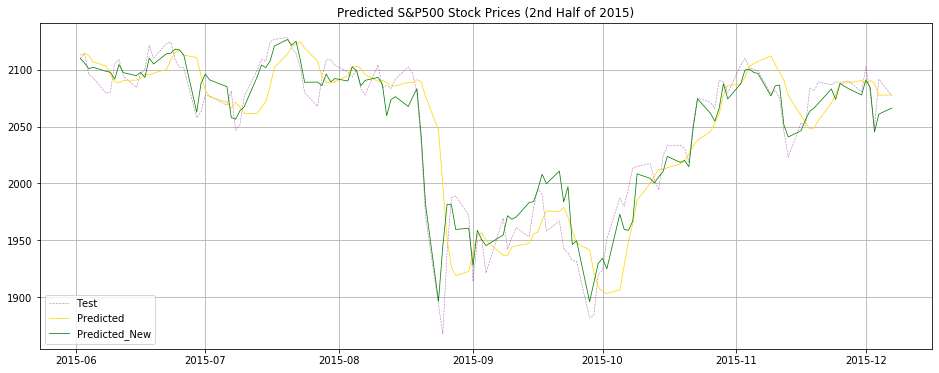

In [12]:
test2  = sphist2[(sphist2["Date"] > datetime(year = 2015, month = 6, day = 1))]

fig = plt.figure(figsize = (16, 6))

plt.plot(test2["Date"], test2[target], color = "purple", linewidth = 0.6, alpha = 0.5, linestyle = "--")
plt.plot(test2["Date"], pred_y[-len(test2):], color = "gold", linewidth = 0.75)
plt.plot(test2["Date"], pred_y2[-len(test2):], color = "green", linewidth = 0.75)

plt.title("Predicted S&P500 Stock Prices (2nd Half of 2015)")
plt.grid(True)
plt.legend({"Test": "purple", "Predicted": "gold", "Predicted_New": "green"})

### Conclusions

- <input type="checkbox" checked> Use historical stock prices data to make future predictions.
- <input type="checkbox" checked> Forecast how the stock market will perform.

<p style='text-align: justify;'>
This project is worth revisiting to further improve the predictive performance. After creating indicators that capture the temporal dependence in the data, we were able to <b>achieve a best MAPE of <code>0.4843%</code></b>. Inspecting the predictions visually through a plot shows that initially the model seems to have a hard time capturing the peaks and the volatility in the data. Furthermore, the predicted values seem to look as if they are a day or two "late" in that the resulting shape is close to the actual data but shifted to the right. It may be worth exploring the phenomena behind the peaks/dips to get better predictions. Creating additional indicators making more use of the <b>range of the prices</b> in the past alleviated this significantly.
</p>

#### For Improvements
- <input type="checkbox" disabled> Use other time-series models such as autoregressive models (AR/ARIMA)
- <input type="checkbox" disabled> Check for seasonality and do exponential smoothing
- <input type="checkbox" disabled> Make out of sample forecasts